# E-Commerce Customer Behavior & Sales Analysis

## 🎯 Project Goal

The goal of this project is to build a model to help identify which customers are likely to return and make multiple purchases within 6 months, helping the business focus on high-value retention strategies. Customer acquisition is expensive. Retaining existing customers is significantly more profitable than acquiring new ones. The project will give insight into what drives customers to purchase multiple times, and how the company can leverage this information to retain customers.

📝 **Notebook Goal**: prepare and enrich the transaction-level ecommerce dataset for the whole time period available in the data. In addition, create a customer-level dataset, containing only the first purchase information for each unique customer, for the purpose of retention modeling.


### 📊 Dataset Overview
This comprehensive dataset contains 5,000 e-commerce transactions from a Turkish online retail platform, spanning from January 2023 to March 2024. The dataset provides detailed insights into customer demographics, purchasing behavior, product preferences, and engagement metrics. The dataset used in this project is publicly available on Kaggle: https://www.kaggle.com/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr.

>  Dataset description and statistics adapted from the original Kaggle dataset.
 
 The dataset contains 18 columns with the following features:

**Order Information**: 
* Order_ID: Unique identifier for each order (ORD_XXXXXX format)
* Date: Transaction date (2023-01-01 to 2024-03-26)
* Customer Demographics
* Customer_ID: Unique customer identifier (CUST_XXXXX format)
* Age: Customer age (18-75 years)
* Gender: Customer gender (Male, Female, Other)
* City: Customer city (10 major Turkish cities)
  
**Product Information**:
* Product_Category: 8 categories (Electronics, Fashion, Home & Garden, Sports, Books, Beauty, Toys, Food)
* Unit_Price: Price per unit (in TRY/Turkish Lira)
* Quantity: Number of units purchased (1-5)
* Transaction Details
* Discount_Amount: Discount applied (if any)
* Total_Amount: Final transaction amount after discount
* Payment_Method: Payment method used (5 types)
  
**Customer Behavior Metrics**:
* Device_Type: Device used for purchase (Mobile, Desktop, Tablet)
* Session_Duration_Minutes: Time spent on website (1-120 minutes)
* Pages_Viewed: Number of pages viewed during session (1-50)
* Is_Returning_Customer: Whether customer has purchased before (True/False)
* Post-Purchase Metrics
* Delivery_Time_Days: Delivery duration (1-30 days)
* Customer_Rating: Customer satisfaction rating (1-5 stars)

📈 **Key Statistics**
* Total Records: 5,000 transactions
* Date Range: January 2023 - March 2024 (15 months)
* Average Transaction Value: ~450 TRY
* Customer Satisfaction: 3.9/5.0 average rating
* Returning Customer Rate: 60%
* Mobile Usage: 55% of transactions


## Data Preparation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [44]:
# Display all columns
pd.set_option('display.max_columns', None)

In [45]:
# Concatenate the datasets
ecommerce_data_1 = pd.read_csv("ecommerce_customer_behavior_dataset_v2.csv")
ecommerce_data_2 = pd.read_csv("ecommerce_customer_behavior_dataset.csv")
ecommerce_data = pd.concat([ecommerce_data_1, ecommerce_data_2], axis=0, ignore_index=True)

ecommerce_data

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22044,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
22045,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
22046,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
22047,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [46]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22049 entries, 0 to 22048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  22049 non-null  object 
 1   Customer_ID               22049 non-null  object 
 2   Date                      22049 non-null  object 
 3   Age                       22049 non-null  int64  
 4   Gender                    22049 non-null  object 
 5   City                      22049 non-null  object 
 6   Product_Category          22049 non-null  object 
 7   Unit_Price                22049 non-null  float64
 8   Quantity                  22049 non-null  int64  
 9   Discount_Amount           22049 non-null  float64
 10  Total_Amount              22049 non-null  float64
 11  Payment_Method            22049 non-null  object 
 12  Device_Type               22049 non-null  object 
 13  Session_Duration_Minutes  22049 non-null  int64  
 14  Pages_

In [47]:
ecommerce_data.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000
mean,34.965441,449.700508,2.831920,59.598256,1210.694234,14.544197,8.998821,6.502109,3.900177
std,11.054313,720.091114,1.451207,216.621317,2265.755590,4.862567,2.394224,3.483322,1.128719
min,18.000000,5.050000,1.000000,0.000000,6.210000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,74.050000,1.000000,0.000000,159.800000,12.000000,7.000000,4.000000,3.000000
50%,35.000000,177.110000,3.000000,0.000000,429.920000,14.000000,9.000000,6.000000,4.000000
75%,42.000000,499.360000,4.000000,25.080000,1199.060000,17.000000,11.000000,8.000000,5.000000
max,75.000000,7900.010000,5.000000,6538.290000,37852.050000,73.000000,24.000000,25.000000,5.000000


* The average age of customers is 35, with the range 18 to 75. Age-targeted marketing could be useful, but extreme ages are rare.
* Most purchases are small, but there are occasional high-value transactions. High spenders may contribute disproportionately to revenue. 
* Many transactions have 0 discount, but it can be useful to calculate discount rate, since the amount depends on the price of the item. 
* Session duration takes an average of 14 minutes, with it's minimum being 1 minute and the maximum 73 minutes.
* Customers view approximately 9 pages per order on average, and give an average rating of 4.

In [48]:
# Check for missing values and duplicates
print(f"Missing values: {ecommerce_data.isna().values.sum()}")
print(f"Duplicates (whole rows): {ecommerce_data.duplicated(subset=None, keep='first').sum()}")
print(f"Order ID duplicates: {ecommerce_data.duplicated(subset=['Order_ID']).sum()}")
print(f"Unique customer IDs: {ecommerce_data['Customer_ID'].nunique()}")
print(f"Repeat customer IDs: {ecommerce_data.duplicated(subset=['Customer_ID']).sum()}")
print(f"The orders are unique (based on Order_ID): {ecommerce_data['Order_ID'].nunique() == ecommerce_data.shape[0]}")

Missing values: 0
Duplicates (whole rows): 0
Order ID duplicates: 0
Unique customer IDs: 5000
Repeat customer IDs: 17049
The orders are unique (based on Order_ID): True


In [49]:
# Check for incosistent data entries
cols_to_check = ['Age', 'Unit_Price', 'Quantity', 'Total_Amount', 'Session_Duration_Minutes', 
                 'Pages_Viewed', 'Delivery_Time_Days',  'Customer_Rating']

print("Number of inconsistent values in the column: ")
for col in cols_to_check:
    print(f"\t{col}: {(ecommerce_data[col] <= 0).sum()}")

# Discount amount can be zero, but cannot be negative
print(f"\tDiscount_Amount: {(ecommerce_data['Discount_Amount'] < 0).sum()}")

Number of inconsistent values in the column: 
	Age: 0
	Unit_Price: 0
	Quantity: 0
	Total_Amount: 0
	Session_Duration_Minutes: 0
	Pages_Viewed: 0
	Delivery_Time_Days: 0
	Customer_Rating: 0
	Discount_Amount: 0


In [50]:
# Convert the Date column to datetime
ecommerce_data['Date'] = pd.to_datetime(ecommerce_data['Date'], errors='coerce')

# Get the total range of dates in the data
print(f"Date range: {ecommerce_data['Date'].min().date()} to {ecommerce_data['Date'].max().date()}")
print(f"Total number of days: {(ecommerce_data['Date'].max() - ecommerce_data['Date'].min()).days}")

# Get the dates that are missing
all_dates = pd.date_range(ecommerce_data['Date'].min(), ecommerce_data['Date'].max())
missing_dates = all_dates.difference(ecommerce_data['Date'].unique())
print(f"Missing dates: {len(missing_dates)}")

Date range: 2023-01-01 to 2024-03-26
Total number of days: 450
Missing dates: 0


In [51]:
# Create new columns: year, month, day, week
def extract_datetime_features(df, column):
    df['Year'] = df[column].dt.year
    df['Month'] = df[column].dt.month
    df['Quarter'] = df[column].dt.quarter
    df['Weekday'] = df['Date'].dt.weekday  
    df['Weekday_Name'] = df['Date'].dt.day_name() 
    df['Month_Name'] = df['Date'].dt.month_name()
    
    return df

ecommerce_data = extract_datetime_features(ecommerce_data, 'Date')
ecommerce_data

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4,2023,5,2,0,Monday,May
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2,2023,10,4,3,Thursday,October
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4,2023,12,4,1,Tuesday,December
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4,2023,5,2,3,Thursday,May
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4,2023,6,2,4,Friday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22044,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1,2024,3,1,1,Tuesday,March
22045,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4,2024,3,1,1,Tuesday,March
22046,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4,2024,3,1,1,Tuesday,March
22047,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4,2024,3,1,1,Tuesday,March


In [52]:
# Create new columns 
def create_columns(df):
    df['Discount_Rate'] = df['Discount_Amount'] / (df['Unit_Price'] * df['Quantity'])
    df['Is_Weekend'] = df['Date'].dt.weekday >= 5

    return df

ecommerce_data =  create_columns(ecommerce_data)

In [53]:
def get_column_types(df):
    # Identify column types
    num_vars = df.select_dtypes(include=['int64', 'float64'])
    datetime_vars = df.select_dtypes(include=['datetime64[ns]'])
    cat_vars = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
    
    # Print results
    print("Numerical columns:", ", ".join(num_vars.columns))
    print("Categorical columns:", ", ".join(cat_vars.columns))
    print("Datetime columns:", ", ".join(datetime_vars.columns))
    print("\nNote: Some integer-based date features (Year, Month, Week, etc.) "
          "may be treated as categorical due to their discrete or cyclical nature.\n")
    
    # Return dictionary (optional)
    return {
        'numerical': list(num_vars.columns),
        'categorical': list(cat_vars.columns),
        'datetime': list(datetime_vars.columns)
    }
    
column_summary = get_column_types(ecommerce_data)

Numerical columns: Age, Unit_Price, Quantity, Discount_Amount, Total_Amount, Session_Duration_Minutes, Pages_Viewed, Delivery_Time_Days, Customer_Rating, Discount_Rate
Categorical columns: Order_ID, Customer_ID, Gender, City, Product_Category, Payment_Method, Device_Type, Is_Returning_Customer, Year, Month, Quarter, Weekday, Weekday_Name, Month_Name, Is_Weekend
Datetime columns: Date

Note: Some integer-based date features (Year, Month, Week, etc.) may be treated as categorical due to their discrete or cyclical nature.



In [54]:
def detect_outliers(df, column):
    # Calculate 25th percentile
    percentile25 = df[column].quantile(0.25)

    # Calculate 75th percentile
    percentile75 = df[column].quantile(0.75)

    # Calculate the interquantile range
    iqr = percentile75 - percentile25

    # Calculate tresholds for outliers
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Create a Boolean mask to select only relevant rows
    mask = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    # Count number of outliers
    num_outliers = mask.shape[0]
    pct_outliers = num_outliers / len(df) * 100
    print(f"{column}: {num_outliers} outliers ({pct_outliers:.2f}%)")

# Apply function to columns
for column in ecommerce_data.select_dtypes(include=['int64', 'float64']).columns:
    detect_outliers(ecommerce_data, column)

Age: 128 outliers (0.58%)
Unit_Price: 2269 outliers (10.29%)
Quantity: 0 outliers (0.00%)
Discount_Amount: 3686 outliers (16.72%)
Total_Amount: 2501 outliers (11.34%)
Session_Duration_Minutes: 1024 outliers (4.64%)
Pages_Viewed: 15 outliers (0.07%)
Delivery_Time_Days: 616 outliers (2.79%)
Customer_Rating: 0 outliers (0.00%)
Discount_Rate: 159 outliers (0.72%)


Outliers were identified using the IQR method.
However, in an e-commerce context, high-value transactions, large discounts, and long sessions represent meaningful customer behavior rather than data errors. Therefore, outliers were retained and handled using transformations and capping to preserve business signal while ensuring model robustness. Before continuing, let's visualize the data where the percentage of outliers is $\geq 10 \%$:

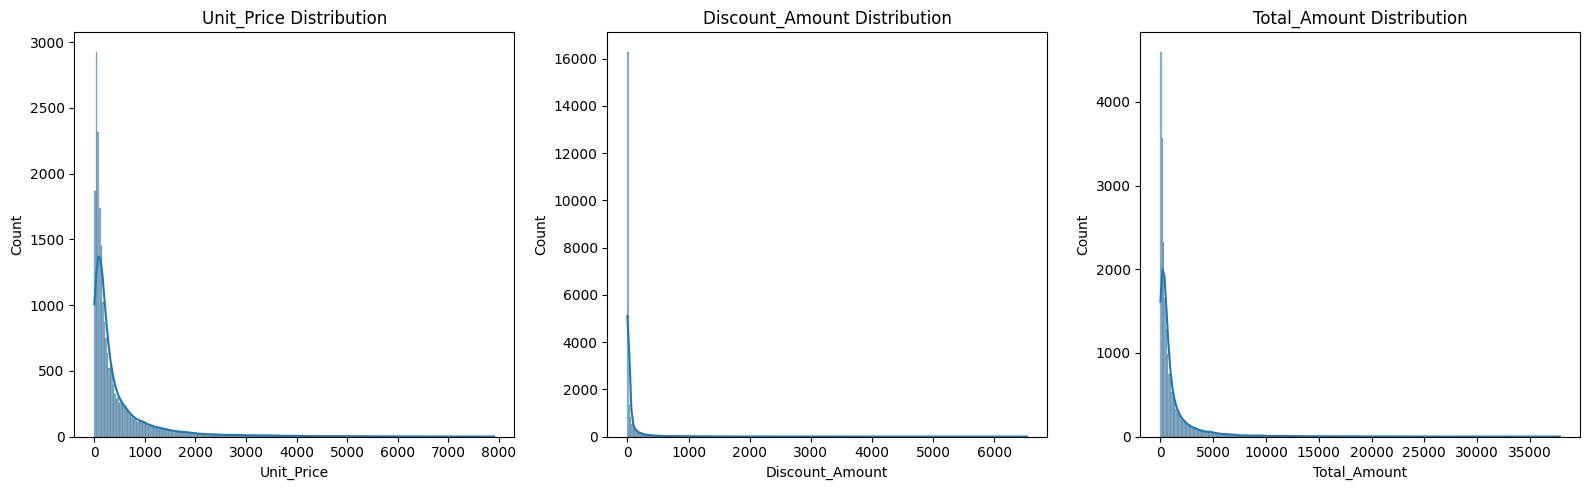

In [55]:
# Columns with more than 10% outliers
cols_to_plot = ['Unit_Price', 'Discount_Amount', 'Total_Amount']

# Plot columns
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=ecommerce_data, x=col, ax=axes[i], kde=True)
    # axes[i].set_yscale('log') - makes the plot noisy so it is omitted here
    axes[i].set_title(f"{col.title()} Distribution")
    
plt.tight_layout()
plt.show()

From the plots above, it is evident that Unit_Price is the primary driver of extreme values in the dataset. Since both `Discount_Amount` and Total_Amount are directly dependent on price and quantity, their skewness is largely inherited from high-priced transactions rather than independent anomalies. In contrast, `Discount_Rate` (the percentage discount applied) exhibits very few extreme values, indicating that the skewness in monetary variables is primarily driven by product pricing rather than aggressive discounting strategies.

The distribution further shows that the majority of purchased items are priced below approximately 2,000 TRY, while a relatively small number of high-value purchases contribute disproportionately to the right tail of the distribution. These high-price transactions represent legitimate business activity rather than data errors and will therefore be retained for modeling purposes.

Later, when modeling, these variables can be log-transformed to reduce skewness for models such as logistic regression, hich assume linear relationships between predictors and the log-odds of the target. Tree-based models (Random Forest, XGBoost) handle skewness well, because they don't assume linearity or normality, so log-transformation isn't strictly reqired.

### Retention definition

The goal is now to define **retention**, and in order to do this I will inspect the data further. Retention can be defined in many ways, and the definition is dictated by the data itself. Retention is defined relative to each customer’s first purchase date rather than a fixed calendar year.
For example, if I decided to define retention as "the probability that the customer made 3 purchases during 2023", it would give me a small window to test my hypothesis on the data from 2024, since only the first quarter Q1 is available. A much better option is to split the data into 6-month windows, meaning:
1. Training data: first purchase between january and june of 2023 (6-month window ends by Dec 2023)
2. Test data: first purchase was July–Sept 2023 (6-month window ends by March 2024)

This setup ensures that:

* All customers have equal opportunity to meet the retention threshold.
* The model is trained on earlier customers and evaluated on later customers.
* Data from 2024 is used only to compute retention outcomes for the test cohort, not for model training.

In essence, train on early 2023 customers, test on later 2023 customers, labels are computed using 6-month lifecycle window, while 2024 is used only to observe outcomes for test cohort. The question that I am essentially trying to answer is: "After their first purchase, will this customer become a high-engagement buyer within 6 months?"

In [56]:
# First purchase date per customer (from full dataset)
first_purchase_dates = (ecommerce_data
    .groupby('Customer_ID')['Date']
    .min()
    .reset_index())

first_purchase_dates.columns = ['Customer_ID', 'First_Purchase_Date']

# Merge the datasets
ecommerce_data = ecommerce_data.merge(first_purchase_dates,
    on='Customer_ID',
    how='left')

ecommerce_data

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name,Discount_Rate,Is_Weekend,First_Purchase_Date
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4,2023,5,2,0,Monday,May,0.000000,False,2023-05-29
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2,2023,10,4,3,Thursday,October,0.214230,False,2023-05-29
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4,2023,12,4,1,Tuesday,December,0.000000,False,2023-05-29
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4,2023,5,2,3,Thursday,May,0.205051,False,2023-02-27
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4,2023,6,2,4,Friday,June,0.000000,False,2023-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22044,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1,2024,3,1,1,Tuesday,March,0.209436,False,2023-02-05
22045,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4,2024,3,1,1,Tuesday,March,0.000000,False,2023-01-26
22046,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4,2024,3,1,1,Tuesday,March,0.133824,False,2023-01-11
22047,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4,2024,3,1,1,Tuesday,March,0.000000,False,2023-05-07


In [57]:
# Define 6-month window for purchases
ecommerce_data['Six_Months_Window'] = (ecommerce_data['First_Purchase_Date'] + pd.DateOffset(months=6))

# Keeps only purchases that occurred within 6 months of each customer's first purchase.
purchases_within_6m = ecommerce_data[ecommerce_data['Date'] <= ecommerce_data['Six_Months_Window']]

purchase_counts_6m = (purchases_within_6m
    .groupby('Customer_ID')['Order_ID']
    .count()
    .reset_index())

purchase_counts_6m.columns = ['Customer_ID', 'Num_Purchases_6m']
purchase_counts_6m

,Customer_ID,Num_Purchases_6m
0,CUST_00001,3
1,CUST_00002,3
2,CUST_00003,2
3,CUST_00004,2
4,CUST_00005,4
...,...,...
4995,CUST_04996,4
4996,CUST_04997,2
4997,CUST_04998,2
4998,CUST_04999,2


In [58]:
# Get the distribution of purchases within the 6 month window
purchase_counts_6m['Num_Purchases_6m'].value_counts()

Num_Purchases_6m
2    1752
3    1295
1     793
4     643
5     311
6     132
7      44
8      23
9       7
Name: count, dtype: int64

<Axes: xlabel='Num_Purchases_6m', ylabel='count'>

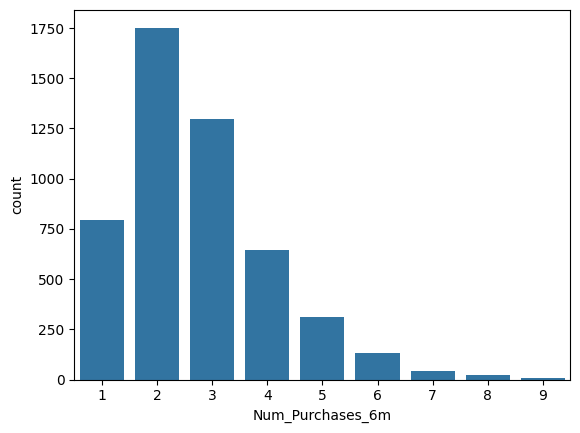

In [59]:
sns.countplot(data = purchase_counts_6m, x = 'Num_Purchases_6m')

In e-commerce it can happen that the customer orders $2$ or more items on the same day, instead of just $1$ item. The cell below shows that there are $104$ cases 
where the customer ordered $2$ items on the same day, and only $2$ cases where the customer ordered $3$ items. Hence, $104+2=106$ cases with customers having multiple purchases the same day. This information should be taken into account during data preparation and modeling, because the model may see different rows for the same customer and interpret them as different customers, which is not desirable.

There are 2 approaches to this problem:
1. Treat same-day purchases as separate purchases (separate events)
2. Combine same-day purchases into a single purchase
3. Keep only one of the purchases on a given day

Out of 21,941 customer-day combinations, 106 days had $\geq2$ orders (~0.48% of customer-days), which is very small. My choice is to combine the purchases, since 'engagement' is usually measured over a period of time, so it doesn't make sense to treat these events as independent. Therefore, I believe that the best approach is to aggregate same-day first purchases.

In [60]:
# Count number of purchases per customer per day
purchases_per_day = ecommerce_data.groupby(['Customer_ID', 'Date'])['Order_ID'].count().reset_index()
purchases_per_day.rename(columns={'Order_ID': 'Num_Purchases_Same_Day'}, inplace=True)
multiple_purchases_same_day = purchases_per_day[purchases_per_day['Num_Purchases_Same_Day'] >= 2]

print(f"Number of customer-days with multiple purchases: {multiple_purchases_same_day.shape[0]}")
purchases_per_day['Num_Purchases_Same_Day'].value_counts()

Number of customer-days with multiple purchases: 106


Num_Purchases_Same_Day
1    21835
2      104
3        2
Name: count, dtype: int64

In [61]:
# Get the mean and median value for the number of orders (within 6 months)
print(f"Median value: {purchase_counts_6m['Num_Purchases_6m'].median(): .1f}")
print(f"Mean value: {purchase_counts_6m['Num_Purchases_6m'].mean(): .1f}")

Median value:  2.0
Mean value:  2.7


The dataset has a right skew, because the mean value is larger than the median. Value of $2$ is also the most common value (the mode). Since the purchase count variable is discrete and right-skewed, the median value of 2 indicates that customers making three or more purchases exhibit above-typical engagement within six months. Based on this information, I could choose the treshold of either 2 or 3 orders in 6 months to define retention. 
My choice is to count `Retention = 1` if the number of orders is 3 or above, because I interpret that it represents a meaningful change in customer behavior (high engagement). In addition, it gives a balance distribution of retention, approximately 50:50. In contrast, choosing the treshold at 2 or more orders would give me an imbalanced dataset, with 84% of customer with retention 1 and only 16% with retention 0, which would primarily reflect minimal repeat activity rather than high engagement.

Hence, the following choice for `Retention` variable is made to capture high-engagement behaviour:
* `Retention=1` if a customer placed $3$ or more orders within 6 months of their first purchase.
* `Retention=0` if a customer placed fewer than $3$ orders within 6 months of their first purchase.

In [62]:
# Define retention=1 if a customer purchased 3 or more items within 6 months
purchase_counts_6m['Retention'] = (purchase_counts_6m['Num_Purchases_6m'] >= 3).astype(int)
purchase_counts_6m['Retention'].value_counts()

Retention
0    2545
1    2455
Name: count, dtype: int64

In order to do retention modeling, I want to keep just the date orders when the first purchase was made. Moreover, only features which are available at time of first purchase should be included in the data during modeling, to prevent data leakage.

In [79]:
# Extract first purchase rows for each customer
first_purchase_rows_mask = ecommerce_data['Date'] == ecommerce_data['First_Purchase_Date']
first_purchases_details = ecommerce_data[first_purchase_rows_mask].copy()

# Merge retention to first purchase details
first_purchases_details = first_purchases_details.merge(
    purchase_counts_6m[['Customer_ID', 'Retention']],
    on='Customer_ID',
    how='left')

# Verify the changes
first_purchases_details

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name,Discount_Rate,Is_Weekend,First_Purchase_Date,Six_Months_Window,Retention
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4,2023,5,2,0,Monday,May,0.000000,False,2023-05-29,2023-11-29,1
1,ORD_000005-1,CUST_00005,2023-03-16,32,Male,Ankara,Home & Garden,533.67,3,0.00,1601.01,Bank Transfer,Mobile,12,8,False,5,5,2023,3,1,3,Thursday,March,0.000000,False,2023-03-16,2023-09-16,1
2,ORD_000011-1,CUST_00011,2023-04-08,29,Male,Kayseri,Beauty,212.45,4,0.00,849.80,Credit Card,Mobile,8,8,True,5,5,2023,4,2,5,Saturday,April,0.000000,True,2023-04-08,2023-10-08,0
3,ORD_000013-1,CUST_00013,2023-02-09,37,Female,Istanbul,Home & Garden,799.42,1,172.04,627.38,Digital Wallet,Mobile,12,7,True,13,5,2023,2,1,3,Thursday,February,0.215206,False,2023-02-09,2023-08-09,0
4,ORD_000014-1,CUST_00014,2023-01-22,18,Female,Konya,Food,74.76,1,0.00,74.76,Debit Card,Desktop,13,6,True,5,3,2023,1,1,6,Sunday,January,0.000000,True,2023-01-22,2023-07-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,ORD_004566,CUST_04566,2024-02-17,28,Female,Istanbul,Beauty,78.42,2,13.55,143.29,Bank Transfer,Mobile,22,7,True,4,5,2024,2,1,5,Saturday,February,0.086394,True,2024-02-17,2024-08-17,0
5020,ORD_003038,CUST_03038,2024-02-22,37,Female,Bursa,Food,15.15,2,1.50,28.80,Credit Card,Mobile,15,8,False,5,5,2024,2,1,3,Thursday,February,0.049505,False,2024-02-22,2024-08-22,1
5021,ORD_001718,CUST_01718,2024-02-26,37,Female,Bursa,Toys,305.32,1,0.00,305.32,Credit Card,Desktop,3,10,True,6,4,2024,2,1,0,Monday,February,0.000000,False,2024-02-26,2024-08-26,0
5022,ORD_002341,CUST_02341,2024-03-03,43,Male,Ankara,Food,18.47,2,0.00,36.94,Digital Wallet,Tablet,19,7,False,11,1,2024,3,1,6,Sunday,March,0.000000,True,2024-03-03,2024-09-03,0


In [80]:
print(f"Number of customers making 2 or more orders on the same first day purchase: {first_purchases_details['Customer_ID'].duplicated().sum()}")
print(f"Number of customers in total: {first_purchases_details['Customer_ID'].nunique()}")
print(f"Number of first days the customers made a purchase:  {first_purchases_details['First_Purchase_Date'].nunique()}")

Number of customers making 2 or more orders on the same first day purchase: 24
Number of customers in total: 5000
Number of first days the customers made a purchase:  379


The result above suggests that $0.48\%$ of customers has $2$ or more first-day orders. This wouldn't affect the model negatively, since the percentage is small, however it is necessary that Customer_ID is unique. Hence, these rows where customer ID's occur twice should be handled.

It can happen that the same customer places 2 orders on the same day. Hence, I need to check the duplicates for `Customer_ID` for this filtered dataset.

In [81]:
# Get duplicate entries for Customer_ID
duplicate_entries = first_purchases_details[first_purchases_details['Customer_ID'].duplicated()]
duplicate_entries

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name,Discount_Rate,Is_Weekend,First_Purchase_Date,Six_Months_Window,Retention
616,ORD_000887-2,CUST_00887,2023-07-11,42,Male,Istanbul,Fashion,304.66,1,0.00,304.66,Cash on Delivery,Desktop,16,6,True,4,3,2023,7,3,1,Tuesday,July,0.000000,False,2023-07-11,2024-01-11,1
700,ORD_000998-2,CUST_00998,2023-06-04,42,Female,Kayseri,Toys,158.33,4,115.26,518.06,Debit Card,Mobile,20,12,True,11,4,2023,6,2,6,Sunday,June,0.181993,True,2023-06-04,2023-12-04,1
736,ORD_001038-2,CUST_01038,2023-05-22,18,Female,Ankara,Toys,108.36,2,0.00,216.72,Credit Card,Mobile,16,6,True,12,1,2023,5,2,0,Monday,May,0.000000,False,2023-05-22,2023-11-22,1
753,ORD_001059-2,CUST_01059,2023-12-04,41,Male,Gaziantep,Books,90.02,2,13.04,167.00,Credit Card,Mobile,19,5,True,6,3,2023,12,4,0,Monday,December,0.072428,False,2023-12-04,2024-06-04,1
779,ORD_001093-2,CUST_01093,2023-04-21,43,Female,Ankara,Food,51.46,2,0.00,102.92,Credit Card,Mobile,15,11,True,7,5,2023,4,2,4,Friday,April,0.000000,False,2023-04-21,2023-10-21,1
825,ORD_001155-2,CUST_01155,2023-01-18,54,Male,Gaziantep,Books,33.93,1,0.00,33.93,Credit Card,Mobile,13,7,True,7,1,2023,1,1,2,Wednesday,January,0.000000,False,2023-01-18,2023-07-18,0
871,ORD_001223-2,CUST_01223,2023-05-02,42,Female,Konya,Books,21.50,1,3.74,17.76,Credit Card,Mobile,17,6,True,4,4,2023,5,2,1,Tuesday,May,0.173953,False,2023-05-02,2023-11-02,0
1026,ORD_001425-2,CUST_01425,2023-06-26,22,Female,Istanbul,Food,33.07,3,0.00,99.21,Digital Wallet,Desktop,15,10,True,4,2,2023,6,2,0,Monday,June,0.000000,False,2023-06-26,2023-12-26,1
1147,ORD_001585-2,CUST_01585,2023-03-09,40,Female,Konya,Food,99.13,1,0.00,99.13,Debit Card,Mobile,11,15,True,3,4,2023,3,1,3,Thursday,March,0.000000,False,2023-03-09,2023-09-09,1
2017,ORD_002791-2,CUST_02791,2023-03-17,42,Male,Antalya,Home & Garden,1195.25,1,0.00,1195.25,Bank Transfer,Desktop,15,8,True,4,5,2023,3,1,4,Friday,March,0.000000,False,2023-03-17,2023-09-17,1


There are duplicates, meaning there are cases where on the first day of purchase, the customer made 2 purchases that same day. Closer inspection of the dataset shows no indication that these orders belong to the same order (indicating an error in data), because column values like payment method, device type, unit price etc. are different for different order ID's. Hence, these observations are not data errors or duplicated records, but represent distinct transactions made on the same calendar day by the same customer. 

Now, the question is how to handle categorical columns in the data, without losing valuable information. To do this, I will first check the cardinality of these columns, and if the cardinality is low, multi-hot encoding is one of the options for preserving the information from the same-day purchases. On the other hand, since there are very few cases where 2 or more orders were made the same day, perhaps the fact that there were 2 orders placed the same day would give more insight that the details and specifics of those orders.

In [82]:
# Check the cardinality of categorical columns
cols_to_check = ['Product_Category', 'Payment_Method', 'Device_Type', 'City', 'Gender']

for col in cols_to_check:
    print(ecommerce_data[col].value_counts())
    print('-'*30)

Product_Category
Sports           2915
Beauty           2833
Books            2822
Food             2722
Toys             2700
Electronics      2698
Home & Garden    2681
Fashion          2678
Name: count, dtype: int64
------------------------------
Payment_Method
Credit Card         8813
Debit Card          5586
Digital Wallet      4241
Bank Transfer       2273
Cash on Delivery    1136
Name: count, dtype: int64
------------------------------
Device_Type
Mobile     12338
Desktop     7556
Tablet      2155
Name: count, dtype: int64
------------------------------
City
Istanbul     5686
Ankara       3157
Izmir        2672
Bursa        2217
Adana        1704
Antalya      1620
Gaziantep    1532
Konya        1437
Kayseri      1108
Eskisehir     916
Name: count, dtype: int64
------------------------------
Gender
Female    11105
Male      10611
Other       333
Name: count, dtype: int64
------------------------------


There are **two options** that this problem with duplicates can be handled: 

1. **Multi-hot encoding** is an appropriate option, since categorical columns have low cardinality.
2. **Aggregating features** and keeping one row per customer.

When considering numerical variables, the choice can be to average or sum numerical values depending on what the variable represents and the type of signal we want to preserve. Summing would capture cummulative effects of the customer's behavior, while averaging (with or without weights) captures typical behavior of the customer. In addition, counts of certain features, such as number of categories, number of devices, number of payment methods etc. provides additional information which add richness to the data.

In essence, same-day multiple purchases are treated as behavioral signals and incorporated via structured aggregation. A comprehensive feature set is generated, and model-based feature selection or regularization will later control complexity, ensuring no potentially useful signal is lost prematurely.

For prediction retention, only features available at the time of the first purchase day are used, because the goal is to predict future engagement of customers based on their first day behaviour. About 0.48% customers placed 2 or more orders on their first purchase, and these multiple purchases may carry useful behavioral information. To capture this, all first-day orders are aggregated per customer: numerical features such as total spend, quantity, and discounts are summed.For categorical features representing first-day behavior, since they cannot be aggregated properly without multi-hot encoding, I choose to keep the rows with more expensive orders. This is because the largest purchase typically reflects the customer’s main intent and level of engagement, while smaller purchases are usually secondary and accidental. Using the most expensive order preserves the strongest signal of the customer’s first-day behavior for retention prediction. After aggregation, only one row for each customer is kept in the dataset. This ensures that each Customer_ID has a single row, while preserving the full signal of first-day engagement for modeling, and option 2 is the chosen approach for this dataset.

In [84]:
# Show all duplicates of customers with multiple first-day orders
duplicate_counts = first_purchases_details.groupby('Customer_ID').size()
duplicates = duplicate_counts[duplicate_counts > 1]

multi_orders = first_purchases_details[first_purchases_details['Customer_ID'].isin(duplicates.index)]
multi_orders.sort_values(['Customer_ID', 'Total_Amount'], ascending=[True, False])

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name,Discount_Rate,Is_Weekend,First_Purchase_Date,Six_Months_Window,Retention
4277,ORD_000041,CUST_00041,2023-03-23,43,Female,Adana,Sports,1255.68,3,0.00,3767.04,Debit Card,Desktop,22,9,False,6,4,2023,3,1,3,Thursday,March,0.000000,False,2023-03-23,2023-09-23,0
21,ORD_000041-1,CUST_00041,2023-03-23,43,Female,Adana,Beauty,135.85,2,33.29,238.41,Credit Card,Desktop,10,9,False,8,3,2023,3,1,3,Thursday,March,0.122525,False,2023-03-23,2023-09-23,0
615,ORD_000887-1,CUST_00887,2023-07-11,42,Male,Istanbul,Beauty,166.60,2,0.00,333.20,Bank Transfer,Mobile,14,13,True,13,3,2023,7,3,1,Tuesday,July,0.000000,False,2023-07-11,2024-01-11,1
616,ORD_000887-2,CUST_00887,2023-07-11,42,Male,Istanbul,Fashion,304.66,1,0.00,304.66,Cash on Delivery,Desktop,16,6,True,4,3,2023,7,3,1,Tuesday,July,0.000000,False,2023-07-11,2024-01-11,1
644,ORD_000925-1,CUST_00925,2023-05-07,49,Male,Eskisehir,Home & Garden,1117.62,1,168.68,948.94,Digital Wallet,Mobile,13,6,True,5,2,2023,5,2,6,Sunday,May,0.150928,True,2023-05-07,2023-11-07,1
4515,ORD_000925,CUST_00925,2023-05-07,49,Male,Eskisehir,Sports,126.18,2,0.00,252.36,Debit Card,Desktop,30,11,True,3,5,2023,5,2,6,Sunday,May,0.000000,True,2023-05-07,2023-11-07,1
699,ORD_000998-1,CUST_00998,2023-06-04,42,Female,Kayseri,Home & Garden,426.90,3,172.34,1108.36,Credit Card,Mobile,13,10,True,6,5,2023,6,2,6,Sunday,June,0.134567,True,2023-06-04,2023-12-04,1
700,ORD_000998-2,CUST_00998,2023-06-04,42,Female,Kayseri,Toys,158.33,4,115.26,518.06,Debit Card,Mobile,20,12,True,11,4,2023,6,2,6,Sunday,June,0.181993,True,2023-06-04,2023-12-04,1
736,ORD_001038-2,CUST_01038,2023-05-22,18,Female,Ankara,Toys,108.36,2,0.00,216.72,Credit Card,Mobile,16,6,True,12,1,2023,5,2,0,Monday,May,0.000000,False,2023-05-22,2023-11-22,1
735,ORD_001038-1,CUST_01038,2023-05-22,18,Female,Ankara,Food,138.11,1,26.07,112.04,Credit Card,Mobile,13,8,True,3,4,2023,5,2,0,Monday,May,0.188763,False,2023-05-22,2023-11-22,1


In [75]:
# Get the indices of the most expensive purchase per customer
idx_max_amount = first_purchases_details.groupby('Customer_ID')['Total_Amount'].idxmax()
most_expensive_orders = first_purchases_details.loc[idx_max_amount]


# Define aggregation dictionary 
agg_dict = {
    # Keep the columns as they are (they are the same for all duplicated customers)
    'First_Purchase_Date': 'first',
    'Age': 'first',
    'Gender': 'first',  
    'City': 'first',    
    'Is_Returning_Customer': 'first',
    'Year': 'first',
    'Month': 'first',
    'Quarter': 'first',
    'Weekday': 'first',
    'Weekday_Name': 'first',
    'Month_Name': 'first',
    'Is_Weekend': 'first',
    'Six_Months_Window': 'first',
    
    # Sum features
    'Total_Amount': 'sum',
    'Quantity': 'sum',
    'Discount_Amount': 'sum',
    
    # Average features
    'Discount_Rate': 'mean',
    'Session_Duration_Minutes': 'mean',
    'Pages_Viewed': 'mean',
    'Customer_Rating': 'mean',
    'Delivery_Time_Days': 'mean',
    
    # Count the number of orders 
    'Order_ID': 'count',
    
    # Count the number of unique values in each column
    'Product_Category': 'nunique',
    'Payment_Method': 'nunique',
    'Device_Type': 'nunique',
    
    # Target
    'Retention': 'max'
}

# Group by Customer_ID and aggregate features using a dictionary
customer_first_purchase = first_purchases_details.groupby('Customer_ID').agg(agg_dict)

# For categorical features, replace with the values from the most expensive order
cat_cols = ['Product_Category', 'Payment_Method', 'Device_Type']
customer_first_purchase[cat_cols] = most_expensive_orders.set_index('Customer_ID')[cat_cols]

# Step 5: Rename columns for clarity
customer_first_purchase = customer_first_purchase.rename(columns={
    'Total_Amount': 'Total_Spend',
    'Quantity': 'Total_Quantity',
    'Discount_Amount': 'Total_Discount',
    'Discount_Rate': 'Avg_Discount_Rate',
    'Session_Duration_Minutes': 'Avg_Session_Duration_Minutes',
    'Pages_Viewed': 'Avg_Pages_Viewed',
    'Customer_Rating': 'Avg_Customer_Rating',
    'Delivery_Time_Days': 'Avg_Delivery_Time_Days',
    'Order_ID': 'Num_First_Day_Orders',
})

# Confirm the result
print(f"Shape: {customer_first_purchase.shape}\n")
print(f"Duplicate customers: {customer_first_purchase.index.duplicated().sum()}\n")
print(f"Distribution: {customer_first_purchase['Retention'].value_counts()}\n")

Shape: (5000, 26)

Duplicate customers: 0

Distribution: Retention
0    2545
1    2455
Name: count, dtype: int64



In [76]:
customer_first_purchase

,First_Purchase_Date,Age,Gender,City,Is_Returning_Customer,Year,Month,Quarter,Weekday,Weekday_Name,Month_Name,Is_Weekend,Six_Months_Window,Total_Spend,Total_Quantity,Total_Discount,Avg_Discount_Rate,Avg_Session_Duration_Minutes,Avg_Pages_Viewed,Avg_Customer_Rating,Avg_Delivery_Time_Days,Num_First_Day_Orders,Product_Category,Payment_Method,Device_Type,Retention
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
CUST_00001,2023-05-29,40,Male,Ankara,True,2023,5,2,0,Monday,May,False,2023-11-29,29.18,1,0.0,0.0,14.0,9.0,4.0,13.0,1,Books,Digital Wallet,Mobile,1
CUST_00002,2023-02-27,33,Male,Istanbul,True,2023,2,1,0,Monday,February,False,2023-08-27,332.34,2,0.0,0.0,3.0,8.0,5.0,8.0,1,Fashion,Debit Card,Mobile,1
CUST_00003,2023-01-13,42,Male,Konya,False,2023,1,1,4,Friday,January,False,2023-07-13,66.44,1,0.0,0.0,9.0,5.0,5.0,3.0,1,Food,Debit Card,Desktop,0
CUST_00004,2024-01-15,53,Male,Izmir,False,2024,1,1,0,Monday,January,False,2024-07-15,112.65,1,0.0,0.0,9.0,6.0,4.0,5.0,1,Food,Bank Transfer,Mobile,0
CUST_00005,2023-03-16,32,Male,Ankara,False,2023,3,1,3,Thursday,March,False,2023-09-16,1601.01,3,0.0,0.0,12.0,8.0,5.0,5.0,1,Home & Garden,Bank Transfer,Mobile,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST_04996,2023-07-07,34,Male,Antalya,False,2023,7,3,4,Friday,July,False,2024-01-07,341.38,2,0.0,0.0,18.0,7.0,3.0,8.0,1,Sports,Bank Transfer,Mobile,1
CUST_04997,2023-01-31,43,Female,Adana,True,2023,1,1,1,Tuesday,January,False,2023-07-31,148.68,2,0.0,0.0,20.0,12.0,4.0,4.0,1,Fashion,Debit Card,Tablet,0
CUST_04998,2023-04-27,72,Female,Kayseri,False,2023,4,2,3,Thursday,April,False,2023-10-27,482.90,5,0.0,0.0,9.0,8.0,3.0,12.0,1,Toys,Credit Card,Desktop,0


In [85]:
# Create a folder if it doesn't exist
os.makedirs("data/cleaned", exist_ok=True)

# Explort customer and transaction datasets to created folder
customer_first_purchase.reset_index().to_csv("data/cleaned/customer_retention_modeling_dataset.csv", index=False)
ecommerce_data.to_csv("data/cleaned/ecommerce_customer_behavior_dataset_cleaned.csv", index=False)

## Key Takeaways

1. **Data cleaning & enrichment**:
   * Raw data was cleaned and enriched with new columns such as Year, Month, Quarter, Weekday, etc. to provide temporal context.
   * Outliers are detected and retained, since they represent expected anomalies in the data.
   * Extracted first purchase dates for each customer, for the purpose of retention modeling.
3. **Feature preparation**: in order to ensure one row per customer and avoid data leakage, the features are adjusted as follows:
    * Numerical features were aggregated (sum/mean) to represent first-day behavior.
    * Categorical features that could not be aggregated meaningfully (e.g., product category, payment method, device type) were represented by the data for the most expensive purchase per customer, capturing the strongest behavioral signal of their first day purchase.
4. **Retention definition**: retention is defined based on mean and median values, and also order counts, to capture high-engagement customers, in the following ways:
    * Retention = 1 if a customer placed ≥3 orders within 6 months.
    * Retention distribution is roughly balanced (~50:50), making it suitable for modeling.


## Next Steps

* Perform exploratory data analysis (EDA) to gain deeper insight into the data
* Analyze distributions of numerical and categorical features.
* Explore correlations with retention and look for potential feature transformations.